In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta # pip install pandas-ta
import yfinance as yf # pip install yfinance

In [2]:
listings = ['MMM', 'DJI','AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DOW', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PG', 'CRM', 'TRV', 'UNH', 'VZ', 'V', 'WBA', 'WMT', 'DIA'] 

In [3]:
df = yf.download(tickers=listings, period='10y', interval= '1d', auto_adjust=False )

[*********************100%***********************]  32 of 32 completed


In [4]:
# stack and unstack indexed columns
df = df.stack(level=0).unstack(level=1)

# set each column name to TICKER - VALUE
df.columns = df.columns.map(lambda x: f'{x[0]} - {x[1]}')

# create date column from index
df = df.reset_index()
df = df.rename(columns={'index': 'Date'})

In [5]:
for ticker in listings:
    col_name = f'{ticker} - Dividend'
    div_series = yf.Ticker(ticker).dividends
    series_df = div_series.to_frame(name=col_name)
    series_df.index = series_df.index.tz_convert(None).floor('D')
    df = pd.merge(df, series_df, left_on='Date', right_index=True, how='left')
    df[col_name] = df[col_name].fillna(0)

In [6]:
df[df['DJI - Close'] != 0]

,Date,AAPL - Adj Close,AAPL - Close,AAPL - High,AAPL - Low,AAPL - Open,AAPL - Volume,AMGN - Adj Close,AMGN - Close,AMGN - High,...,NKE - Dividend,PG - Dividend,CRM - Dividend,TRV - Dividend,UNH - Dividend,VZ - Dividend,V - Dividend,WBA - Dividend,WMT - Dividend,DIA - Dividend
0,2013-06-24,12.481573,14.376429,14.595000,14.216071,14.550000,480746000.0,73.601387,96.139999,97.230003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,2013-06-25,12.484365,14.379643,14.563929,14.243929,14.489286,314162800.0,73.785118,96.379997,98.750000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,2013-06-26,12.342971,14.216786,14.456786,14.130714,14.425000,367724000.0,76.250252,99.599998,100.169998,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,2013-06-27,12.209951,14.063571,14.335357,14.055000,14.258929,337246000.0,75.783264,98.989998,100.620003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
4,2013-06-28,12.295223,14.161786,14.295357,13.888214,13.977143,578516400.0,75.530632,98.660004,99.879997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2513,2023-06-16,184.919998,184.919998,186.990005,184.270004,186.729996,101235600.0,229.660004,229.660004,231.949997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.776
2514,2023-06-20,185.009995,185.009995,186.100006,184.410004,184.410004,49799100.0,228.589996,228.589996,230.839996,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2515,2023-06-21,183.960007,183.960007,185.410004,182.589996,184.899994,49515700.0,227.039993,227.039993,230.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2516,2023-06-22,187.000000,187.000000,187.050003,183.669998,183.740005,51245300.0,229.660004,229.660004,229.880005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [7]:
df.columns.tolist()

['Date',
 'AAPL - Adj Close',
 'AAPL - Close',
 'AAPL - High',
 'AAPL - Low',
 'AAPL - Open',
 'AAPL - Volume',
 'AMGN - Adj Close',
 'AMGN - Close',
 'AMGN - High',
 'AMGN - Low',
 'AMGN - Open',
 'AMGN - Volume',
 'AXP - Adj Close',
 'AXP - Close',
 'AXP - High',
 'AXP - Low',
 'AXP - Open',
 'AXP - Volume',
 'BA - Adj Close',
 'BA - Close',
 'BA - High',
 'BA - Low',
 'BA - Open',
 'BA - Volume',
 'CAT - Adj Close',
 'CAT - Close',
 'CAT - High',
 'CAT - Low',
 'CAT - Open',
 'CAT - Volume',
 'CRM - Adj Close',
 'CRM - Close',
 'CRM - High',
 'CRM - Low',
 'CRM - Open',
 'CRM - Volume',
 'CSCO - Adj Close',
 'CSCO - Close',
 'CSCO - High',
 'CSCO - Low',
 'CSCO - Open',
 'CSCO - Volume',
 'CVX - Adj Close',
 'CVX - Close',
 'CVX - High',
 'CVX - Low',
 'CVX - Open',
 'CVX - Volume',
 'DIA - Adj Close',
 'DIA - Close',
 'DIA - High',
 'DIA - Low',
 'DIA - Open',
 'DIA - Volume',
 'DIS - Adj Close',
 'DIS - Close',
 'DIS - High',
 'DIS - Low',
 'DIS - Open',
 'DIS - Volume',
 'DJI - A

# 1. Load Data Dow Jones Industrial Average (DJI)

## significantmodification is introduced in 
* Sup-port Vector Machines Algorithm(SVMA) which results in higher accuracy rates. Presence of kernel and other parameters make it more flexible.

In [11]:
# insert libraries
import pandas_datareader as pdr  

In [12]:
 df.shape

(2518, 225)

In [13]:
df1= df.reset_index()['DJI - Close']

In [14]:
df1

0       14659.599609
1       14760.299805
2       14910.099609
3       15024.500000
4       14909.599609
            ...     
2513             NaN
2514             NaN
2515             NaN
2516             NaN
2517             NaN
Name: DJI - Close, Length: 2518, dtype: float64

In [81]:
df1_without_nan = df.dropna(subset=['DJI - Close'])  # Specify columns to check for NaN values

In [82]:
df1.dropna(inplace=True)  # Drop NaN values from 'df' in-place

In [83]:
df1

0       14659.599609
1       14760.299805
2       14910.099609
3       15024.500000
4       14909.599609
            ...     
2184    33223.800781
2185    34058.800781
2186    33892.601562
2187    33294.898438
2188    33891.300781
Name: DJI - Close, Length: 2017, dtype: float64

In [84]:
# Check for missing data in the DataFrame
missing_data = df.isnull().sum()

# Display the columns with missing data and their corresponding counts
print(missing_data)

Date                0
AAPL - Adj Close    0
AAPL - Close        0
AAPL - High         0
AAPL - Low          0
                   ..
VZ - Dividend       0
V - Dividend        0
WBA - Dividend      0
WMT - Dividend      0
DIA - Dividend      0
Length: 225, dtype: int64


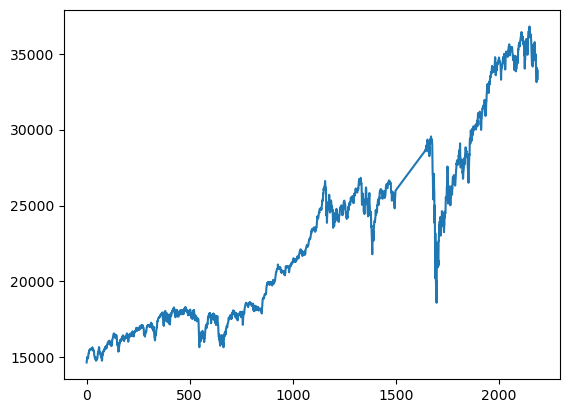

In [85]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [117]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.svm import SVR

## SVM Algorithm o predict DJI

In [93]:
X = df['Date']
y = df['DJI - Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Reshape the target variable to a 1D array
y_train = np.array(y_train).reshape(-1)


X_train = np.array(X_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)

In [94]:
# Scale the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
# Train the SVM model
svm = SVR(kernel='rbf')  # You can try different kernel types like 'linear', 'poly', 'sigmoid', etc.
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)
y_pred

array([30087.8041564 , 30127.98527254, 30279.3591121 , 30280.46541745,
       30268.10055236, 30124.35594456, 30155.99923786, 30167.52323669,
       30282.00517708, 30260.95476925, 30258.09651717, 30282.12313461,
       30154.20943222, 30268.05504877, 30010.78185161, 29981.95544329,
       29978.99851961, 29986.27892173, 30043.07905555, 30137.06168131,
       30066.76527632, 30258.81932054, 30011.84748338, 29978.80687908,
       30281.94738122, 30269.79274066, 30269.50963826, 30217.16975295,
       30258.45886402, 30053.31877063, 30204.28829591, 30072.51967975,
       29979.83569018, 30086.07513061, 30042.05503156, 30045.358153  ,
       30281.42958708, 30054.13432662, 29978.29500086, 30280.91054878,
       30264.95910147, 30279.03793956, 30245.29675181, 29992.35800139,
       29982.10458658, 30222.20660635, 30018.5877544 , 30281.7243089 ,
       30052.5532446 , 30033.09871587, 30257.31308105, 29994.14970132,
       30273.46777875, 30069.21708081, 29978.36128194, 30277.5208623 ,
      

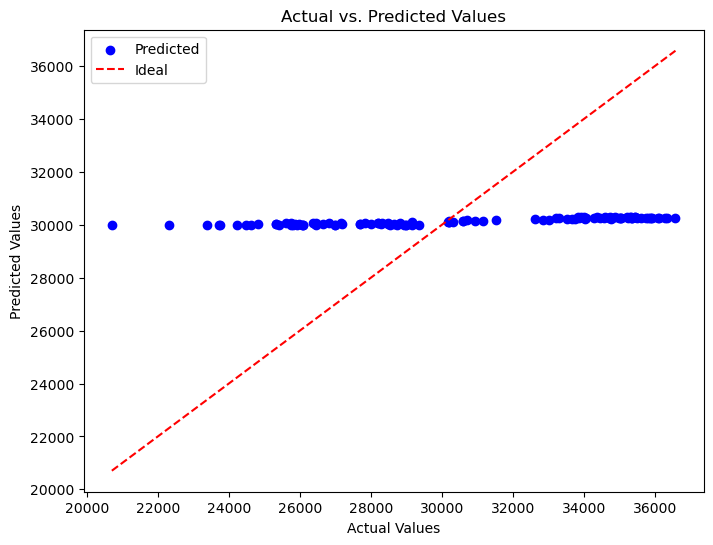

In [96]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [118]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()

In [137]:
# Define the start and end dates for the data (10 years to train the model)
start_date = "2013-06-01"
end_date = "2023-06-16"

ticker_list = ['^DJI']
# Fetch the stock data for Dow Jones Industrial Average (DJI)
DJI_data = yf.download(ticker_list, start=start_date, end=end_date)[['Close']]

# predict for 7 days (1 week) June 17-23, 2023

[*********************100%***********************]  1 of 1 completed


In [138]:
# Extract the "Close" prices as the target variable
target = DJI_data["Close" ].values

# Create a feature matrix using the last 10 years of data
features = np.arange(len(target)).reshape(-1, 1)

# Scale the feature matrix using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

In [139]:
# Select one stock from the listings
stock_symbol = 'DJI'  # Change this to the desired stock symbol

In [143]:
# Extract the "Close" prices as the target variable
target = DJI_data["Close"].values

In [144]:
# Create a feature matrix using the last 10 years of data
features = np.arange(len(target)).reshape(-1, 1)

In [145]:
# Scale the feature matrix using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

In [148]:
# Selecting the features (X) and the target variable (y)
X = df[['Date']]
y = df['DJI - Close']

In [149]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=1)

In [150]:
# Initialize and train the SVR model
svr = SVR(kernel="linear")
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [151]:
# Predict on the test set
predictions = svr.predict(X_test)

In [152]:
# Print the predicted prices
print("Predicted prices:", predictions)

Predicted prices: [24191.07586129 24313.23723864 24275.66394435 24252.15654997
 24135.77567944 24357.36177399 24287.80300866 24219.20766112
 24498.59882383 24256.3955883  24515.36229359 24121.3244124
 24268.72733617 24381.63990261 24129.80248906 24301.86890857
 24453.12550355 24140.78545201 24477.78899929 24272.58100738
 24178.3587463  24366.03253421 24212.84910363 24254.46875269
 24506.88421693 24517.48181275 24545.42092902 24120.93904528
 24243.29310619 24427.88395713 24334.81779741 24228.07110491
 24584.5356918  24330.9641262  24197.81978591 24304.1811113
 24411.31317093 24519.2159648  24310.34698523 24164.10016283
 24583.95764112 24338.86415218 24154.27330124 24440.215705
 24174.50507509 24159.28307381 24590.12351505 24480.10120202
 24250.0370308  24336.93731658 24356.59103975 24473.93532808
 24534.24528251 24370.4642561  24241.94432126 24504.95738132
 24530.77697843 24238.47601717 24259.67120883 24491.27684853
 24539.06237153 24345.03002612 24528.27209214 24200.13198864
 24244.256

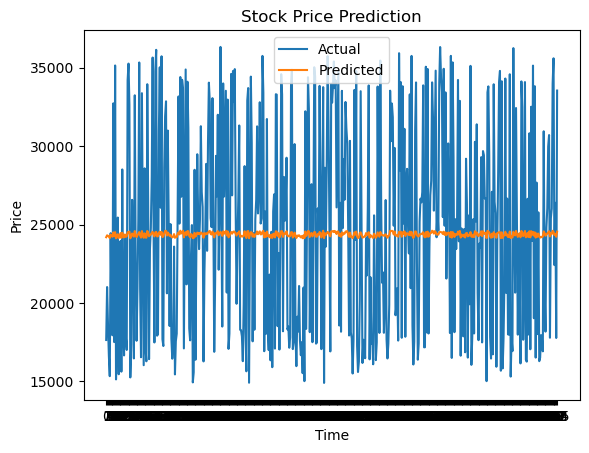

<Figure size 3000x600 with 0 Axes>

In [153]:
# Plotting the actual prices
plt.plot(y_test, label='Actual')
# Plotting the predicted prices
plt.plot(predictions, label='Predicted')

# Set the x-axis labels
plt.xticks(range(len(y_test)))


# Set the plot title and labels
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Price")

# Show the legend
plt.legend()

plt.figure(figsize=(30, 6))


# Display the plot
plt.show()


In [154]:
def get_latest_stock_data(stock_symbol):
    # Use yfinance to get the historical data for the specified stock symbol
    stock_data = yf.download('^DJI', period='1d')
 # Return the latest available data (e.g., the most recent trading day)
    latest_data = stock_data.iloc[-1]

    return latest_data

In [155]:
missing_dates = pd.date_range(start='2023-06-17', end='2022-03-01').difference(stock_data.index)
print("Missing Dates:")
print(missing_dates)

Missing Dates:
DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [156]:
latest_date = df['Date'].max()
print("Latest Date:", latest_date)

Latest Date: 2022-03-02 00:00:00


In [157]:
df['Date'] = pd.to_datetime(df['Date'])

In [165]:
import yfinance as yf
from sklearn.svm import SVR
import numpy as np

def get_stock_data(stock_symbol, start_date, end_date):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    return stock_data

# Specify the stock symbol, start date, and end date
stock_symbol = 'DJI'
start_date = '2022-02-25'
end_date = '2022-03-02'

# Get the stock data for the specified date range
stock_data = get_stock_data(stock_symbol, start_date, end_date)

# Extract the 'Close' prices as the target variable
prices = stock_data['Close'].values


[*********************100%***********************]  1 of 1 completed


In [166]:
print(stock_data.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [168]:
# Prepare the features (X) and target variable (y)
X = np.arange(len(prices)).reshape(-1, 1)
y = prices

# Train the SVR model
svr = SVR(kernel='linear')
svr.fit(X, y)

# Predict the stock prices for the next 7 days
future_X = np.arange(len(prices), len(prices) + 7).reshape(-1, 1)
predicted_prices = svr.predict(future_X)

# Print the predicted prices
print("Predicted Prices:")
for i in range(len(predicted_prices)):
    print(f"Day {i+1}: {predicted_prices[i]}")

Predicted Prices:
Day 1: 33888.6015625
Day 2: 33886.6015625
Day 3: 33884.6015625
Day 4: 33882.6015625
Day 5: 33880.6015625
Day 6: 33878.6015625
Day 7: 33876.6015625


In [169]:
# Prepare the features (X) and target variable (y)
X = np.arange(len(prices)).reshape(-1, 1)
y = prices

# Train the SVR model
svr = SVR(kernel='linear')
svr.fit(X, y)

# Predict the stock prices for the next 7 days
future_X = np.arange(len(prices), len(prices) + 7).reshape(-1, 1)
predicted_prices = svr.predict(future_X)

# Print the predicted prices
print("Predicted Prices:")
for i in range(len(predicted_prices)):
    print(f"Day {i+1}: {predicted_prices[i]}")

# Compare with actual prices
actual_prices = stock_data['Close'].values[-1:]

# Print the actual prices
print("\nActual Prices:")
for i in range(len(actual_prices)):
    print(f"Day {i+1}: {actual_prices[i]}")

Predicted Prices:
Day 1: 33888.6015625
Day 2: 33886.6015625
Day 3: 33884.6015625
Day 4: 33882.6015625
Day 5: 33880.6015625
Day 6: 33878.6015625
Day 7: 33876.6015625

Actual Prices:
Day 1: 33294.8984375
